In [1]:
%matplotlib inline

import numpy as np
from sklearn.datasets import load_boston
from sklearn.utils import shuffle, resample
import matplotlib.pyplot as plt
import sys, os

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))
from miniflow import *

In [2]:
# Load data
data = load_boston()
X_ = data['data']
y_ = data['target']
X_, y_ = shuffle(X_, y_)

In [3]:
# Explore data
print ("Total datasets: {}".format(X_.shape[0]))
print ("Features: {}".format(X_.shape[1]))

Total datasets: 506
Features: 13


In [4]:
# Normalized data
X_ = (X_ - np.mean(X_, axis=0)) / np.std(X_, axis=0)

In [5]:
# Split data
t = int(X_.shape[0] * 0.9)
X_, X_test = X_[:t], X_[t:]
y_, y_test = y_[:t], y_[t:]

t = int(X_.shape[0] * 0.9)
X_train, X_validation = X_[:t], X_[t:]
y_train, y_validation = y_[:t], y_[t:]

In [6]:
n_input = X_.shape[1]
n_output = 1
n_hidden1 = 64
n_hidden2 = 128

In [7]:
W1_ = np.random.randn(n_input, n_hidden1)
b1_ = np.random.randn(n_hidden1)

W2_ = np.random.randn(n_hidden1, n_hidden2)
b2_ = np.random.randn(n_hidden2)

W3_ = np.random.randn(n_hidden2, n_output)
b3_ = np.random.randn(n_output)

In [8]:
X, y = Input(), Input()  
W1, b1 = Input(), Input()  
W2, b2 = Input(), Input()  
W3, b3 = Input(), Input()  

In [9]:
l1 = Linear(X, W1, b1)
s1 = Sigmoid(l1)
l2 = Linear(s1, W2, b2)
s2 = Sigmoid(l2)
l3 = Linear(s2, W3, b3)
cost = MSE(y, l3)

In [10]:
feed_dict = {
    X: X_train,
    y: y_train,
    W1: W1_,
    b1: b1_,
    W2: W2_,
    b2: b2_,
    W3: W3_,
    b3: b3_
}

In [11]:
# Hyperparameter
epochs = 5000
lr = 0.001
batch_size = 100

In [12]:
m = X_train.shape[0]
steps_per_epoch = m // batch_size
graph = topological_sort(feed_dict)
trainables = [W1, b1, W2, b2, W3, b3]
losses = {'train': [], 'validation': []}

In [13]:
#Training
for i in range(epochs):
    train_loss = 0
    val_loss = 0
    for j in range(steps_per_epoch):
        X_batch, y_batch = resample(X_train, y_train, n_samples=batch_size)
        X.value, y.value = X_batch, y_batch
        
        forward_and_backward(graph)
        sgd_update(trainables, lr)
        train_loss += graph[-1].value
        
    train_loss = train_loss / steps_per_epoch
    losses['train'].append(train_loss)
    
    X.value, y.value = X_validation, y_validation
    forward_and_backward(graph, training=False)
    val_loss = graph[-1].value
    losses['validation'].append(val_loss)
    
    #if (i+1) % batch_size == 0:
    print("Epoch: {}, Train Loss: {:.3f}, Validation Loss: {:.3f}".format(i+1, train_loss, val_loss))


Epoch: 1, Train Loss: 569.500, Validation Loss: 238.788
Epoch: 2, Train Loss: 248.305, Validation Loss: 93.574
Epoch: 3, Train Loss: 113.493, Validation Loss: 56.795
Epoch: 4, Train Loss: 61.186, Validation Loss: 48.026
Epoch: 5, Train Loss: 62.239, Validation Loss: 45.096
Epoch: 6, Train Loss: 56.161, Validation Loss: 44.019
Epoch: 7, Train Loss: 38.868, Validation Loss: 43.017
Epoch: 8, Train Loss: 55.649, Validation Loss: 42.250
Epoch: 9, Train Loss: 57.305, Validation Loss: 41.612
Epoch: 10, Train Loss: 39.951, Validation Loss: 40.562
Epoch: 11, Train Loss: 39.798, Validation Loss: 39.593
Epoch: 12, Train Loss: 43.146, Validation Loss: 39.125
Epoch: 13, Train Loss: 58.022, Validation Loss: 38.705
Epoch: 14, Train Loss: 59.997, Validation Loss: 38.624
Epoch: 15, Train Loss: 41.208, Validation Loss: 37.728
Epoch: 16, Train Loss: 36.187, Validation Loss: 36.029
Epoch: 17, Train Loss: 42.881, Validation Loss: 35.279
Epoch: 18, Train Loss: 36.437, Validation Loss: 33.602
Epoch: 19, Trai

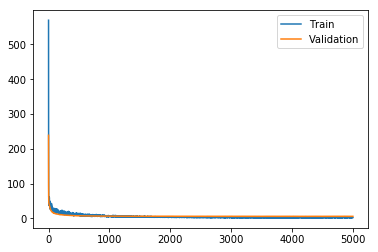

In [14]:
fig, ax = plt.subplots()
x = np.arange(len(losses['train']))
ax.plot(x, losses['train'], label='Train')
ax.plot(x, losses['validation'], label='Validation')
ax.legend()

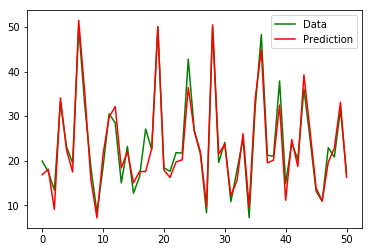

In [18]:
# Test
feed_dict[X] = X_test
feed_dict[y] = y_test

graph = topological_sort(feed_dict)
forward_and_backward(graph, training=False)
prediction = graph[-2].value

fig, ax = plt.subplots()
x = np.arange(len(y_test))
ax.plot(x, y_test, label='Data', color='g')
ax.plot(x, prediction, label='Prediction', color='r')
ax.legend()